In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
df = pd.read_csv('modified_dataset.csv')

In [42]:
df.head()

,,Speaker,Speech,Date,Type,Gender,Party,Category
0,0,SHRI GAURAV GOGOI,This is a country characterised by devotion. T...,"Saturday, February 10, 2024",Union Budget,M,Congress,Issue
1,1,SHRI MADDILA GURUMOORTHY,I would like to speak about Lord Rama and the...,"Saturday, February 10, 2024",Union Budget,M,YSR Congress,Call For Action
2,2,SHRI RAMPRIT MANDAL,I would like to express my gratitude to you f...,"Saturday, February 10, 2024",Union Budget,M,JDU,Call For Action
3,3,SHRI PRATAP CHANDRA SARANGI,Lord Ram is a symbol of dignity. Lord Shri Ra...,"Saturday, February 10, 2024",Union Budget,M,BJP,Appreciate
4,5,SHRI MALOOK NAGAR,Unprecedented work has been done during the 1...,"Saturday, February 10, 2024",Union Budget,M,BSP,Appreciate


In [43]:
df.columns

Index([' ', 'Speaker', 'Speech', 'Date', 'Type', 'Gender', 'Party',
       'Category'],
      dtype='object')

In [44]:
df = df.drop(' ', axis=1)

In [45]:
df.head()

,Speaker,Speech,Date,Type,Gender,Party,Category
0,SHRI GAURAV GOGOI,This is a country characterised by devotion. T...,"Saturday, February 10, 2024",Union Budget,M,Congress,Issue
1,SHRI MADDILA GURUMOORTHY,I would like to speak about Lord Rama and the...,"Saturday, February 10, 2024",Union Budget,M,YSR Congress,Call For Action
2,SHRI RAMPRIT MANDAL,I would like to express my gratitude to you f...,"Saturday, February 10, 2024",Union Budget,M,JDU,Call For Action
3,SHRI PRATAP CHANDRA SARANGI,Lord Ram is a symbol of dignity. Lord Shri Ra...,"Saturday, February 10, 2024",Union Budget,M,BJP,Appreciate
4,SHRI MALOOK NAGAR,Unprecedented work has been done during the 1...,"Saturday, February 10, 2024",Union Budget,M,BSP,Appreciate


In [46]:
df.isnull().sum()

Speaker     0
Speech      0
Date        0
Type        0
Gender      0
Party       0
Category    0
dtype: int64

In [47]:
unique_parties = sorted(df['Party'].unique())
unique_parties

['AAP',
 'AIMIM',
 'All India Trinamool Congress',
 'All India United Democratic Front',
 'Apna Dal',
 'BJD',
 'BJP',
 'BRS',
 'BSP',
 'Bharatiya Janata Yuva Morcha',
 'Communist Party of India',
 'Congress',
 'DMK',
 'GSP',
 'Independent',
 'JDS',
 'JDU',
 'JKNC',
 'Jan Adhikar Party',
 'Jannayak Janta Party',
 'Jharkhand Mukti Morcha',
 'KECM',
 'Kerala Congress',
 'Lok Janshakti Party',
 'NCP',
 'NDP',
 'PMK',
 'RJD',
 'RLJP',
 'RLP',
 'Republican Party of India',
 'SDF',
 'SP',
 'Shiromani Akali Dal',
 'Shiv Sena',
 'Sikkim Krantikari Morcha',
 'TDP',
 'TMC',
 'TPCC',
 'TRS',
 'VCK',
 'YSR Congress']

In [48]:
df['Speaker'].nunique()

408

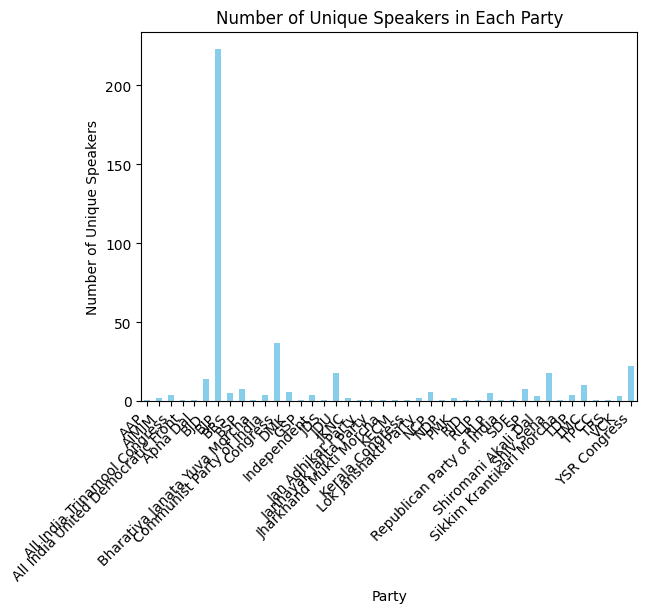

In [49]:
# Group by Party and count unique speakers
party_speaker_counts = df.groupby('Party')['Speaker'].nunique()

# Plot the bar chart
party_speaker_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Party')
plt.ylabel('Number of Unique Speakers')
plt.title('Number of Unique Speakers in Each Party')
plt.xticks(rotation=45, ha='right')
plt.show()

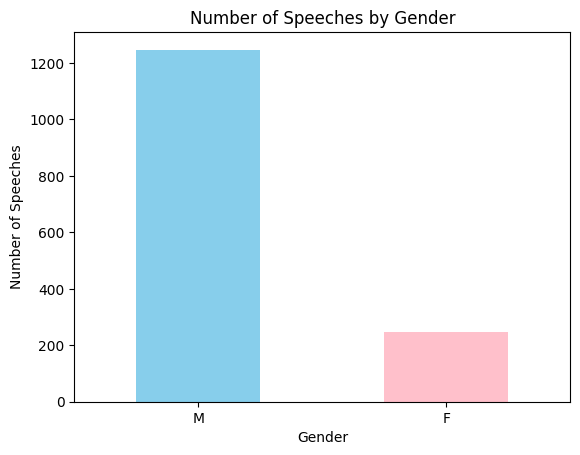

In [50]:
gender_speech_counts = df['Gender'].value_counts()

# Plot the bar chart
gender_speech_counts.plot(kind='bar', color=['skyblue', 'pink'])
plt.xlabel('Gender')
plt.ylabel('Number of Speeches')
plt.title('Number of Speeches by Gender')
plt.xticks(rotation=0)
plt.show()

In [51]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month_Year'] = df['Date'].dt.to_period('M')

speaker_counts = df.groupby(['Month_Year', 'Gender'])['Speaker'].nunique().unstack(fill_value=0)
speaker_counts['Total'] = speaker_counts['F'] + speaker_counts['M']
speaker_counts['Female %'] = (speaker_counts['F'] / speaker_counts['Total']) * 100

print("Total number of speakers and female percentage for each month-year:")
print(speaker_counts)

Total number of speakers and female percentage for each month-year:
Gender       F    M  Total   Female %
Month_Year                           
2019-01      3   36     39   7.692308
2019-02     14   91    105  13.333333
2019-06     10   57     67  14.925373
2019-07     21  104    125  16.800000
2019-08     19   72     91  20.879121
2019-11      2    8     10  20.000000
2020-09     16  102    118  13.559322
2021-02     24   97    121  19.834711
2021-12     11   34     45  24.444444
2022-02      6   28     34  17.647059
2022-03      4   48     52   7.692308
2022-04     11   58     69  15.942029
2022-07     13   73     86  15.116279
2024-02     19  114    133  14.285714


In [52]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year

speaker_counts_yearly = df.groupby(['Year', 'Gender'])['Speaker'].nunique().unstack(fill_value=0)
speaker_counts_yearly['Total'] = speaker_counts_yearly['F'] + speaker_counts_yearly['M']
speaker_counts_yearly['Female %'] = round((speaker_counts_yearly['F'] / speaker_counts_yearly['Total']) * 100, 2)

print("Total number of speakers and female percentage for each year:")
print(speaker_counts_yearly)

Total number of speakers and female percentage for each year:
Gender   F    M  Total  Female %
Year                            
2019    43  243    286     15.03
2020    16  102    118     13.56
2021    27  112    139     19.42
2022    20  141    161     12.42
2024    19  114    133     14.29


In [53]:
# Count the number of unique male and female speakers
gender_counts = df.groupby('Gender')['Speaker'].nunique()
print(gender_counts)

Gender
F     58
M    350
Name: Speaker, dtype: int64


In [54]:
#calculate speaking time in minutes
def calculate_speaking_time(speech_text, average_speaking_rate=150): # Assuming average speaking rate is 150 words per minute
    word_count = len(speech_text.split())
    speaking_time = word_count / average_speaking_rate
    return speaking_time

In [55]:
#calculate word count
def calculate_word_count(speech_text):
    return len(speech_text.split())

In [56]:
df['Speaking_Time'] = df['Speech'].apply(calculate_speaking_time)
df['Word_Count'] = df['Speech'].apply(calculate_word_count)

In [57]:
df

,Speaker,Speech,Date,Type,Gender,Party,Category,Month_Year,Year,Speaking_Time,Word_Count
0,SHRI GAURAV GOGOI,This is a country characterised by devotion. T...,2024-02-10,Union Budget,M,Congress,Issue,2024-02,2024,7.153333,1073
1,SHRI MADDILA GURUMOORTHY,I would like to speak about Lord Rama and the...,2024-02-10,Union Budget,M,YSR Congress,Call For Action,2024-02,2024,1.126667,169
2,SHRI RAMPRIT MANDAL,I would like to express my gratitude to you f...,2024-02-10,Union Budget,M,JDU,Call For Action,2024-02,2024,0.713333,107
3,SHRI PRATAP CHANDRA SARANGI,Lord Ram is a symbol of dignity. Lord Shri Ra...,2024-02-10,Union Budget,M,BJP,Appreciate,2024-02,2024,2.686667,403
4,SHRI MALOOK NAGAR,Unprecedented work has been done during the 1...,2024-02-10,Union Budget,M,BSP,Appreciate,2024-02,2024,0.200000,30
...,...,...,...,...,...,...,...,...,...,...,...
1490,SHRI BHAIRON PRASAD MISHRA,The present Bill seeks to remove discrepancie...,2019-01-04,Union Budget,M,BJP,Call For Action,2019-01,2019,0.746667,112
1491,DR. SHASHI THAROOR,The Supreme Court of India in its landmark ju...,2019-01-02,Union Budget,M,Congress,Blame,2019-01,2019,0.866667,130
1492,SHRI ARVIND SAWANT,The issue is being discussed very seriously in...,2019-01-02,Union Budget,M,Shiv Sena,Issue,2019-01,2019,1.600000,240
1493,SHRI JAYADEV GALLA,The Government has the bounden duty to explai...,2019-01-02,Union Budget,M,TDP,Call For Action,2019-01,2019,1.753333,263


In [58]:
# Calculate total number of speeches, speaking time, and words for male and female MPs
total_speeches_male = df[df['Gender'] == 'M']['Speaker'].count()
total_speeches_female = df[df['Gender'] == 'F']['Speaker'].count()

total_time_male = df[df['Gender'] == 'M']['Speaking_Time'].sum() / 60  # converting from minutes to hours
total_time_female = df[df['Gender'] == 'F']['Speaking_Time'].sum() / 60

total_words_male = df[df['Gender'] == 'M']['Word_Count'].sum()
total_words_female = df[df['Gender'] == 'F']['Word_Count'].sum()

In [59]:
# Calculate total number of speeches, speaking time, and words for all MPs
total_speeches = total_speeches_male + total_speeches_female
total_time = total_time_male + total_time_female
total_words = total_words_male + total_words_female

In [60]:
# Calculate percentage of female speeches, speaking time, and words
percentage_female_speeches = round((total_speeches_female / total_speeches) * 100, 2)
percentage_female_time = round((total_time_female / total_time) * 100, 2)
percentage_female_words = round((total_words_female / total_words) * 100, 2)

In [61]:
data = {
    'Speeches': [total_speeches_male, total_speeches_female, total_speeches, percentage_female_speeches],
    'Speaking time, hours': [total_time_male, total_time_female, total_time, percentage_female_time],
    'Words': [total_words_male, total_words_female, total_words, percentage_female_words],
}

index = ['Male', 'Female', 'Total', '% Female']

result_df = pd.DataFrame(data, index=index)

print(result_df)

          Speeches  Speaking time, hours     Words
Male       1247.00             25.349778  228148.0
Female      248.00              5.153667   46383.0
Total      1495.00             30.503444  274531.0
% Female     16.59             16.900000      16.9


In [62]:
# Filter for female speakers
female_df = df[df['Gender'] == 'F']
female_speaker_party_counts = female_df.groupby(['Speaker', 'Party']).size().reset_index(name='Speech_Count')
top_10_female = female_speaker_party_counts.sort_values(by='Speech_Count', ascending=False).head(10)
print(top_10_female)

                            Speaker         Party  Speech_Count
60   SHRIMATI SUPRIYA SADANAND SULE           NCP            36
37       SHRIMATI NAVNEET RAVI RANA   Independent            21
47               SHRIMATI RAMA DEVI           BJP            11
11          SHRIMATI ANUPRIYA PATEL      Apna Dal            10
49             SHRIMATI RITI PATHAK           BJP            10
3        DR. HEENA VIJAYKUMAR GAVIT           BJP             8
61  SHRIMATI VANGA GEETHA VISWANATH  YSR Congress             7
26           SHRIMATI JASKAUR MEENA           BJP             7
12       SHRIMATI APARAJITA SARANGI           BJP             7
0   DR. BEESETTI VENKATA SATYAVATHI  YSR Congress             6


In [63]:
female_speeches = df[df['Gender'] == 'F']
top_categories_female = female_speeches['Category'].value_counts().head(10)

print("Top 10 categories in which female speakers spoke:")
print(top_categories_female)

Top 10 categories in which female speakers spoke:
Category
Appreciate         95
Call For Action    60
Issue              47
Blame              28
Neutral            18
Name: count, dtype: int64
